In [ ]:
### Scraping NBA Data

In [103]:
import time
import bs4 as bs
import pandas as pd 

from urllib.request import FancyURLopener  
from random import choice 
from bs4 import SoupStrainer, BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
# chrome_options = Options()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('/usr/local/bin/chromedriver', chrome_options = chrome_options)
driver = webdriver.Chrome()

user_agents = [
    'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
    'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16',
    'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246'
]

class MyOpener(FancyURLopener, object):
    version = choice(user_agents)
myopener = MyOpener()

invidivual_url = 'https://www.basketball-reference.com/'

col_names = ['Position', 'Age', 'Team', 'Games', 'Games Started', 'Minutes Played',
             'Field Goals', 'Field Goals Attempted', 'Field Goal Percentage', 'Three Pointers', 
             'Three Pointers Attempted', 'Three Point Percentage', 'Two Pointers', 'Two Pointers Attemped',
             'Two Point Percentage', 'eFG%', 'Free Throws', 'Free Throws Attempted', 'Free Throw Percentage',
             'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebound', 'Assists',
             'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points', 'MVP', 'ROY', 'PPG_leader', 'RPG_leader',
             'APG_leader', 'WS_leader', 'Season']

# Clear lists by running this block
i_season_years = []
i_stat_names = []
i_stats_list = []
######
    
def league_scraper():
    page = myopener.open('https://www.basketball-reference.com/leagues/NBA_' + which_season[5:9] + '_per_game.html')
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    time.sleep(5)
    
    player_names_html = soup.find_all('td', {'class': 'left'})
    for i in range(0, len(player_names_html)):
        player_names = player_names_html[i].find_all('a')
        if 'player' in str(player_names):
            player_names_list.append(player_names[0].get_text())

    all_players = soup.find_all('tr')
    for i in range(1, len(all_players)):
        player = all_players[i].find_all('td')
        for j in range(1, len(player)):
            player_stats = player[j].get_text()
            player_stats_list.append(player_stats)
    
    awards_html = BeautifulSoup(str(soup.select('#info')), 'html.parser').find_all('p')
    awards_dict = {'MVP': [], 'ROY': [], 'PPG_leader': [], 'RPG_leader': [],
               'APG_leader': [], 'WS_leader': []}
    awards = []
    for line in awards_html:
        if 'strong' in str(line):
            awards.append(' '.join(line.get_text().split(': ')[1].split(' ')[0:2]))

    awards = awards[1:]
    for x in range(len(list(awards_dict.keys()))):        
        awards_dict[list(awards_dict.keys())[x]].append(awards[x])

    '''
    driver.get('https://www.basketball-reference.com/leagues/NBA_' + which_season[5:9] + '_per_game.html')
    i = 2
    team_code = []
    while i < len(player_stats_list):
        team_code.append(player_stats_list[i])
        i = i + 28
    team_code = list(dict.fromkeys(team_code))
    for i in range(len(team_code)):
        driver.findElement(By.linkText(team_code[i])).click()
        team_url = str(driver.current_url)
    '''

    x = 0
    y = 28
    for i in range(0,len(player_names_list)):
        temp = []
        for key, value in awards_dict.items():
            if str(value[0]) == player_names_list[i]:    
                temp.append(1)
            else:
                temp.append(0)
        temp.append(which_season)
        player_stats_fixed.append(player_stats_list[x:y] + temp)
        x = x + 28
        y = y + 28
    df = pd.DataFrame(player_stats_fixed, columns = col_names)
    df.insert(0, 'Name', player_names_list)
    df.set_index('Name')
    df.apply(pd.to_numeric, errors='ignore')
    df.astype({'Position': str, 'Team': str})
    
    file_str = 'data/' + which_season + '_player_stats.csv'
    df.to_csv(file_str, index=False)
    
which_stats = input('Would you like to search for invidivual player stats (i) or league wide stats (l): ')
if which_stats == 'i':
    individual_stat_scaper(individual_url)
    stat_lookup()
elif which_stats == 'l':
    which_season = input('Enter the season you would like tyou like to collect stats?o find input for (i.e. 2018-2019): ')
    split_years = which_season.split('-')
    year1 = int(split_years[0])
    year2 = int(split_years[1])
    while year1 < 2019 and year2 < 2020:
        which_season = str(year1) + '-' + str(year2) 
        player_names_list = []
        player_stats_list = []
        player_stats_fixed = []
        league_scraper()
        player_names_list = []
        player_stats_list = []
        player_stats_fixed = []
        year1 = year1 + 1
        year2 = year2 + 1

In [136]:
import os 

csv_list = []
for files in os.listdir('data/'):
    csv_list.append(files)

combined_csv = pd.concat([pd.read_csv('data/' + f) for f in csv_list])
combined_csv.to_csv("combined_csv.csv", index=False, encoding='utf-8-sig')

str

Text(0, 0.5, 'Three Pointers')

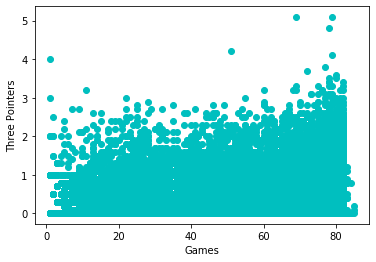

In [137]:
import matplotlib.pyplot as plt 

plt.scatter('Games', 'Three Pointers', c='c', data = combined_csv)
plt.xlabel('Games')
plt.ylabel('Three Pointers')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

plt.scatter(X_test[:,:1].shape, y_train,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

In [ ]:
y_test.shape

In [ ]:
X = df[['Games', 'Assists', 'Turnovers', 'Blocks', 'Steals']]
y = df['Points']
df_columns = ['Games', 'Assists', 'Turnovers', 'Blocks', 'Steals']

In [ ]:
X.values



In [ ]:
page = myopener.open('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')
html = page.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
time.sleep(5)

player_names_html = soup.find_all('td', {'class': 'left'})
for i in range(0, len(player_names_html)):
    player_names = player_names_html[i].find_all('a')
    if 'player' in str(player_names):
        player_names_list.append(player_names[0].get_text())

all_players = soup.find_all('tr')
for i in range(1, len(all_players)):
    player = all_players[i].find_all('td')
    for j in range(1, len(player)):
        player_stats = player[j].get_text()
        player_stats_list.append(player_stats)

In [ ]:
driver.get('https://www.basketball-reference.com/leagues/NBA_2019_per_game.html')
i = 2
team_code = []
team_wins = []
team_losses = []
team_record = []
while i < len(player_stats_list):
    team_code.append(player_stats_list[i])
    i = i + 28
team_code = list(dict.fromkeys(team_code))
for i in range(len(team_code)):
    driver.find_element_by_link_text(team_code[i]).click()
    team_url = str(driver.current_url)
    page = myopener.open(team_url)
    html = page.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    team_record_html = soup.find_all('tr', {'class': 'rowSum'})
    print(team_record_html)
    # for j in range(len(team_record_html))
    driver.back()

In [ ]:
team_url

In [ ]:
page = myopener.open('https://www.basketball-reference.com/teams/PHO/2019.html')
html = page.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
team_record_html = soup.find_all('strong')